## Data Cleaning Packages- Documentation

This notebook explains how to use the packages for data cleaning, which includes ``import_data.py`` and ``sort_data.py``. 

### 1.  The ``import_data.py`` package

The main function in this package is called ``single_pd_matlab_data``, that generates a dataframe with the data store in a Matlab file using HDF5 format.
The package also includes a set of auxiliar functions needed for the ``single_pd_matlab_data``method. This functions are:

1. ``import_matlab_data``: Imports a Matlab file as a series of NumPy arrays
2. ``initialize_datasets``: Initialize the columns of the dataframe

### 2.  The ``sort_data.py`` package

This package generates two dictionaries, one for the charge cycles data and the other for the discharge cycles data. It includes two functions:

1. ``by_cycle``: Creates a dictionary in which the data is sorted by the number of cycle.
2. ``charge_discharge``: Creates two dictionaries, one with the charge cycles and the other with the discharge cycles.


In [1]:
import import_data
import sort_data

C:\Users\maitr\Miniconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In the following cells, each function will be run using as an example one of the CALCE Matlab files. 

Firts, import the data from the Matlab file using the ``import_data`` package

In [2]:
raw = import_data.single_pd_matlab_data('converted_PL03.mat')

In [3]:
len(raw)

2451239

In [4]:
tr = []
for i in range(300, 100000, 400):
    tr.append(raw['time'][i])

In [5]:
vr = []
for i in range(300, 100000, 400):
    vr.append(raw['voltage'][i])

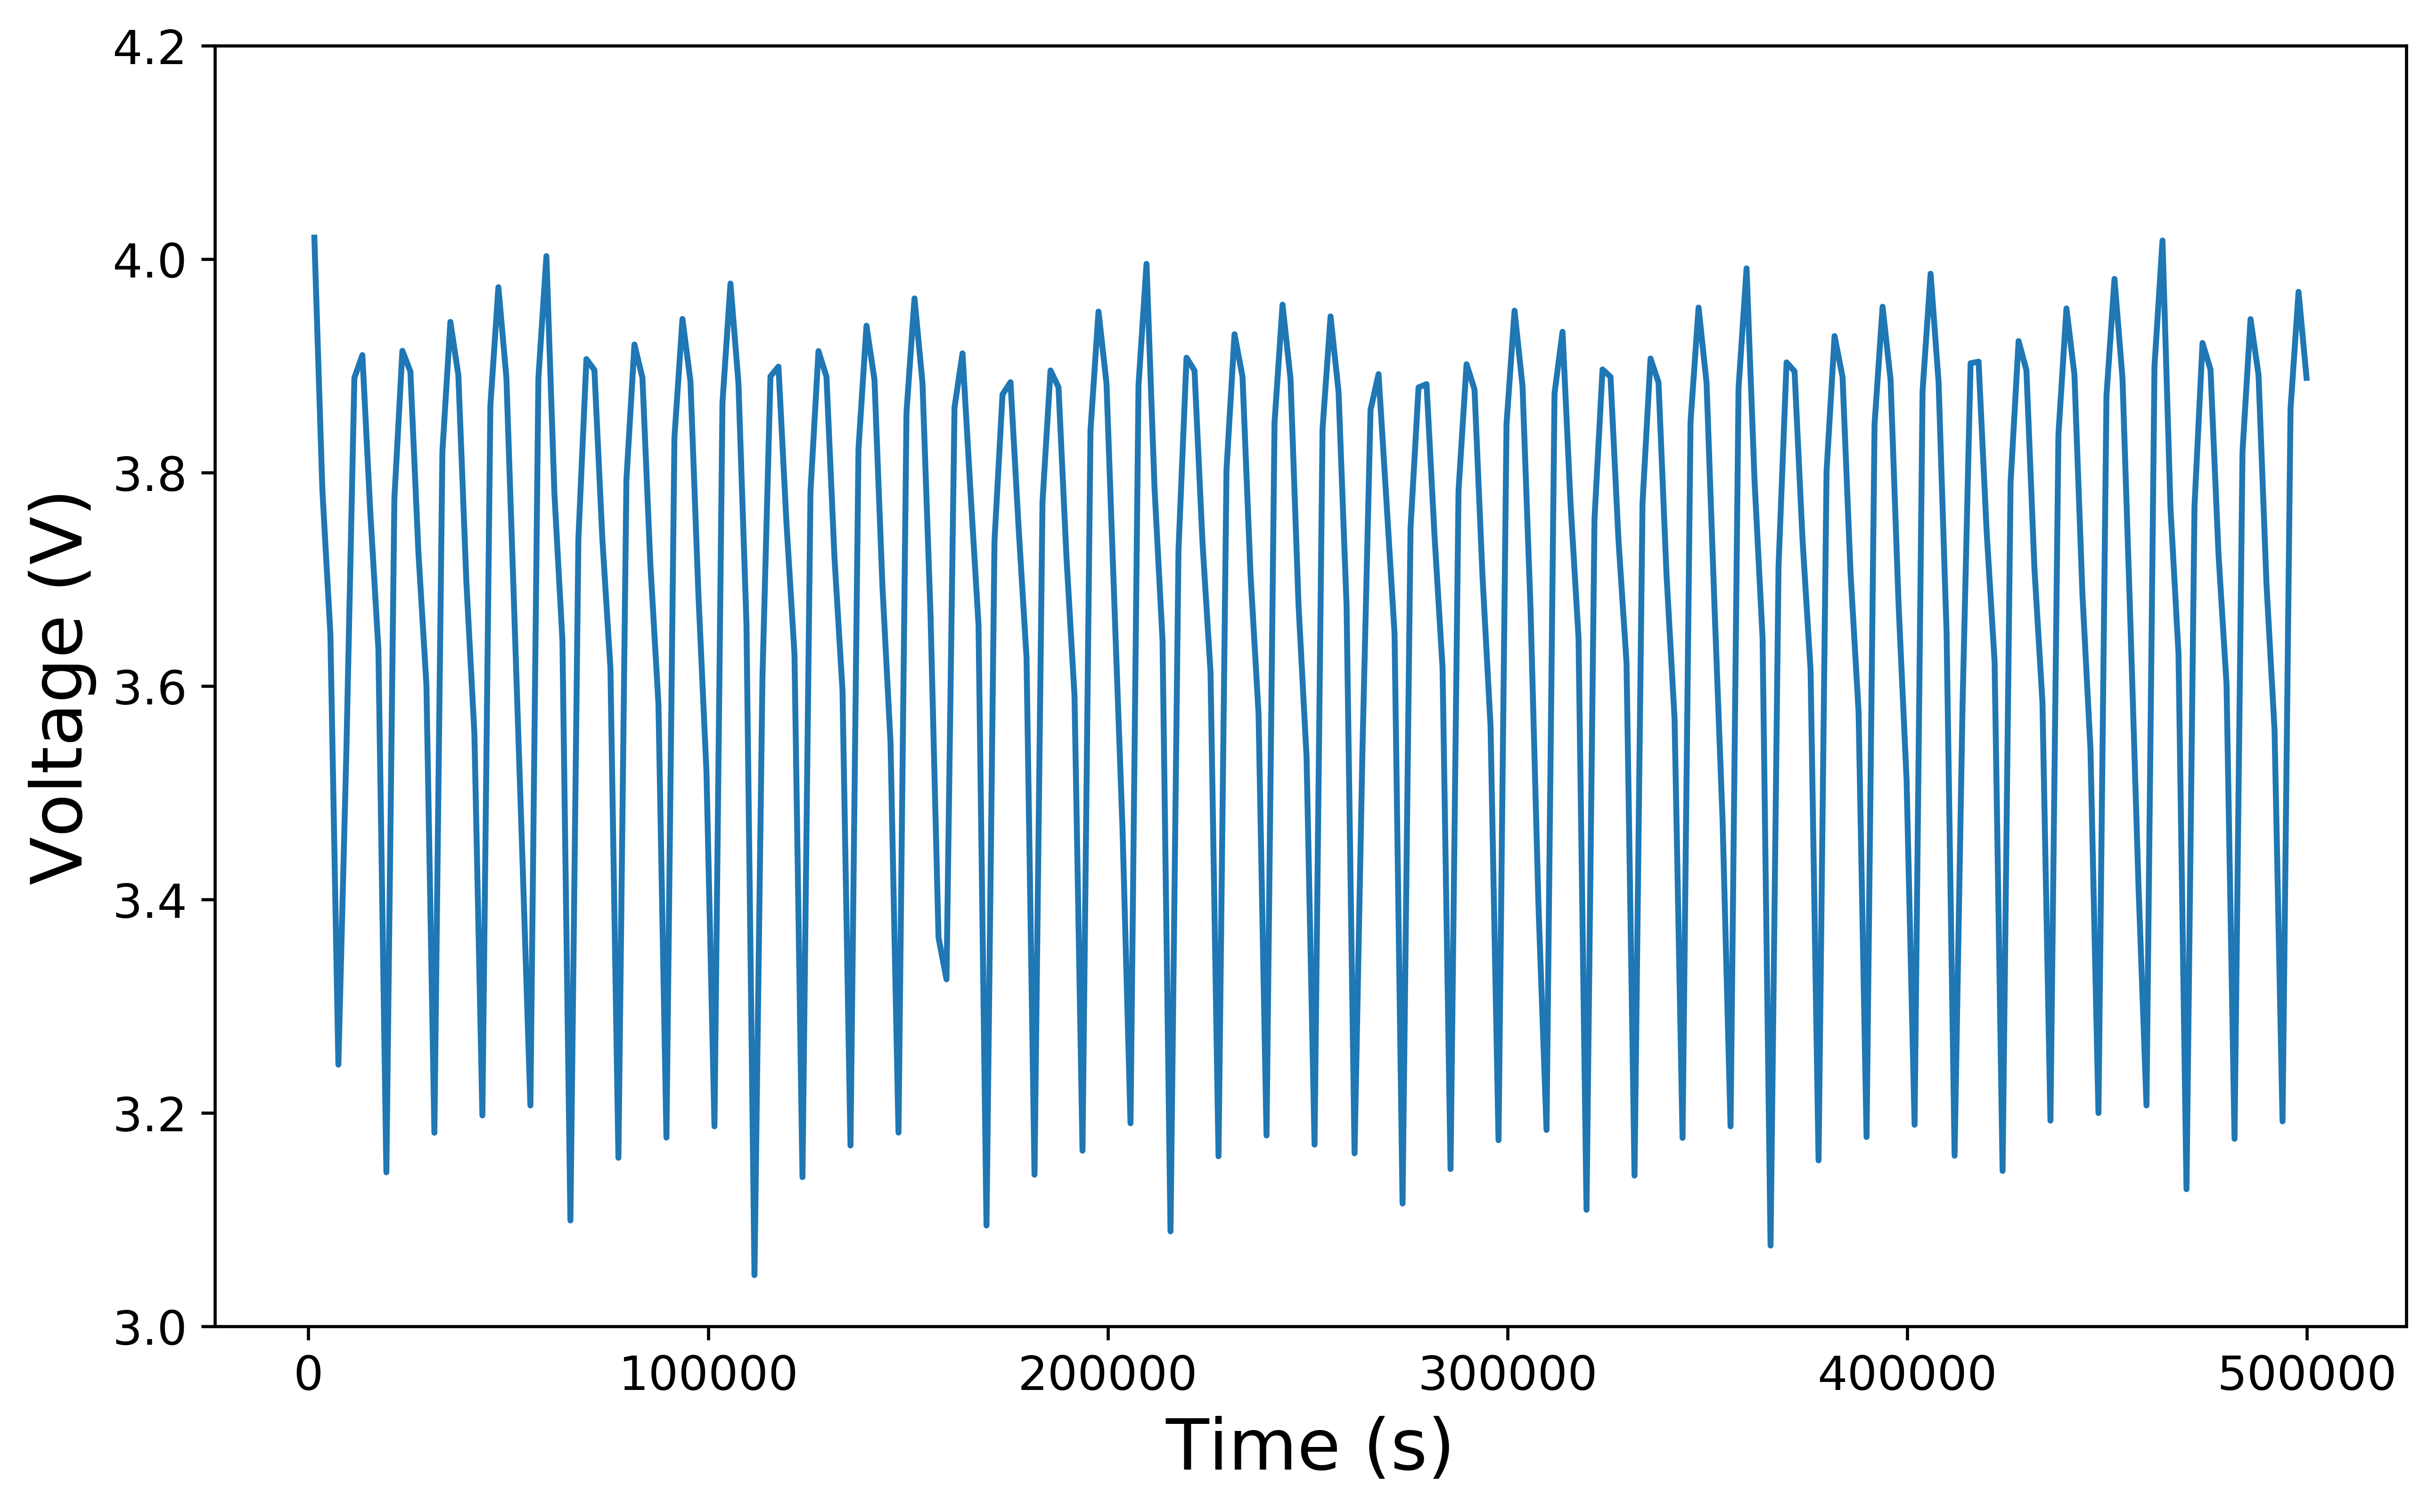

In [149]:
plt.figure(figsize = (10,6), dpi = 600)
plt.plot(tr, vr, lw = 1.5)
plt.ylim(3.0, 4.2)
plt.ylabel('Voltage (V)', fontsize = 18)
plt.xlabel('Time (s)', fontsize = 18)
#plt.title('Comparison of Individual Partial Curve to Full Curves', fontsize = 10)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig("Cycle.png", dpi  =600)

Once all the information has been imported from the Matlab file, it has to be sorted. For that, use the ``sort_data`` package

In [131]:
pcharge, pdischarge = sort_data.charge_discharge('data/converted_PL03.mat')

In [132]:
fcharge, fdischarge2 = sort_data.charge_discharge('converted_PL11.mat')

As a result, we obtain each charge or discharge curve separately. We can see this by plotting some of the curves

In [2]:
import matplotlib.pyplot as plt
import matplotlib.lines 
%matplotlib inline

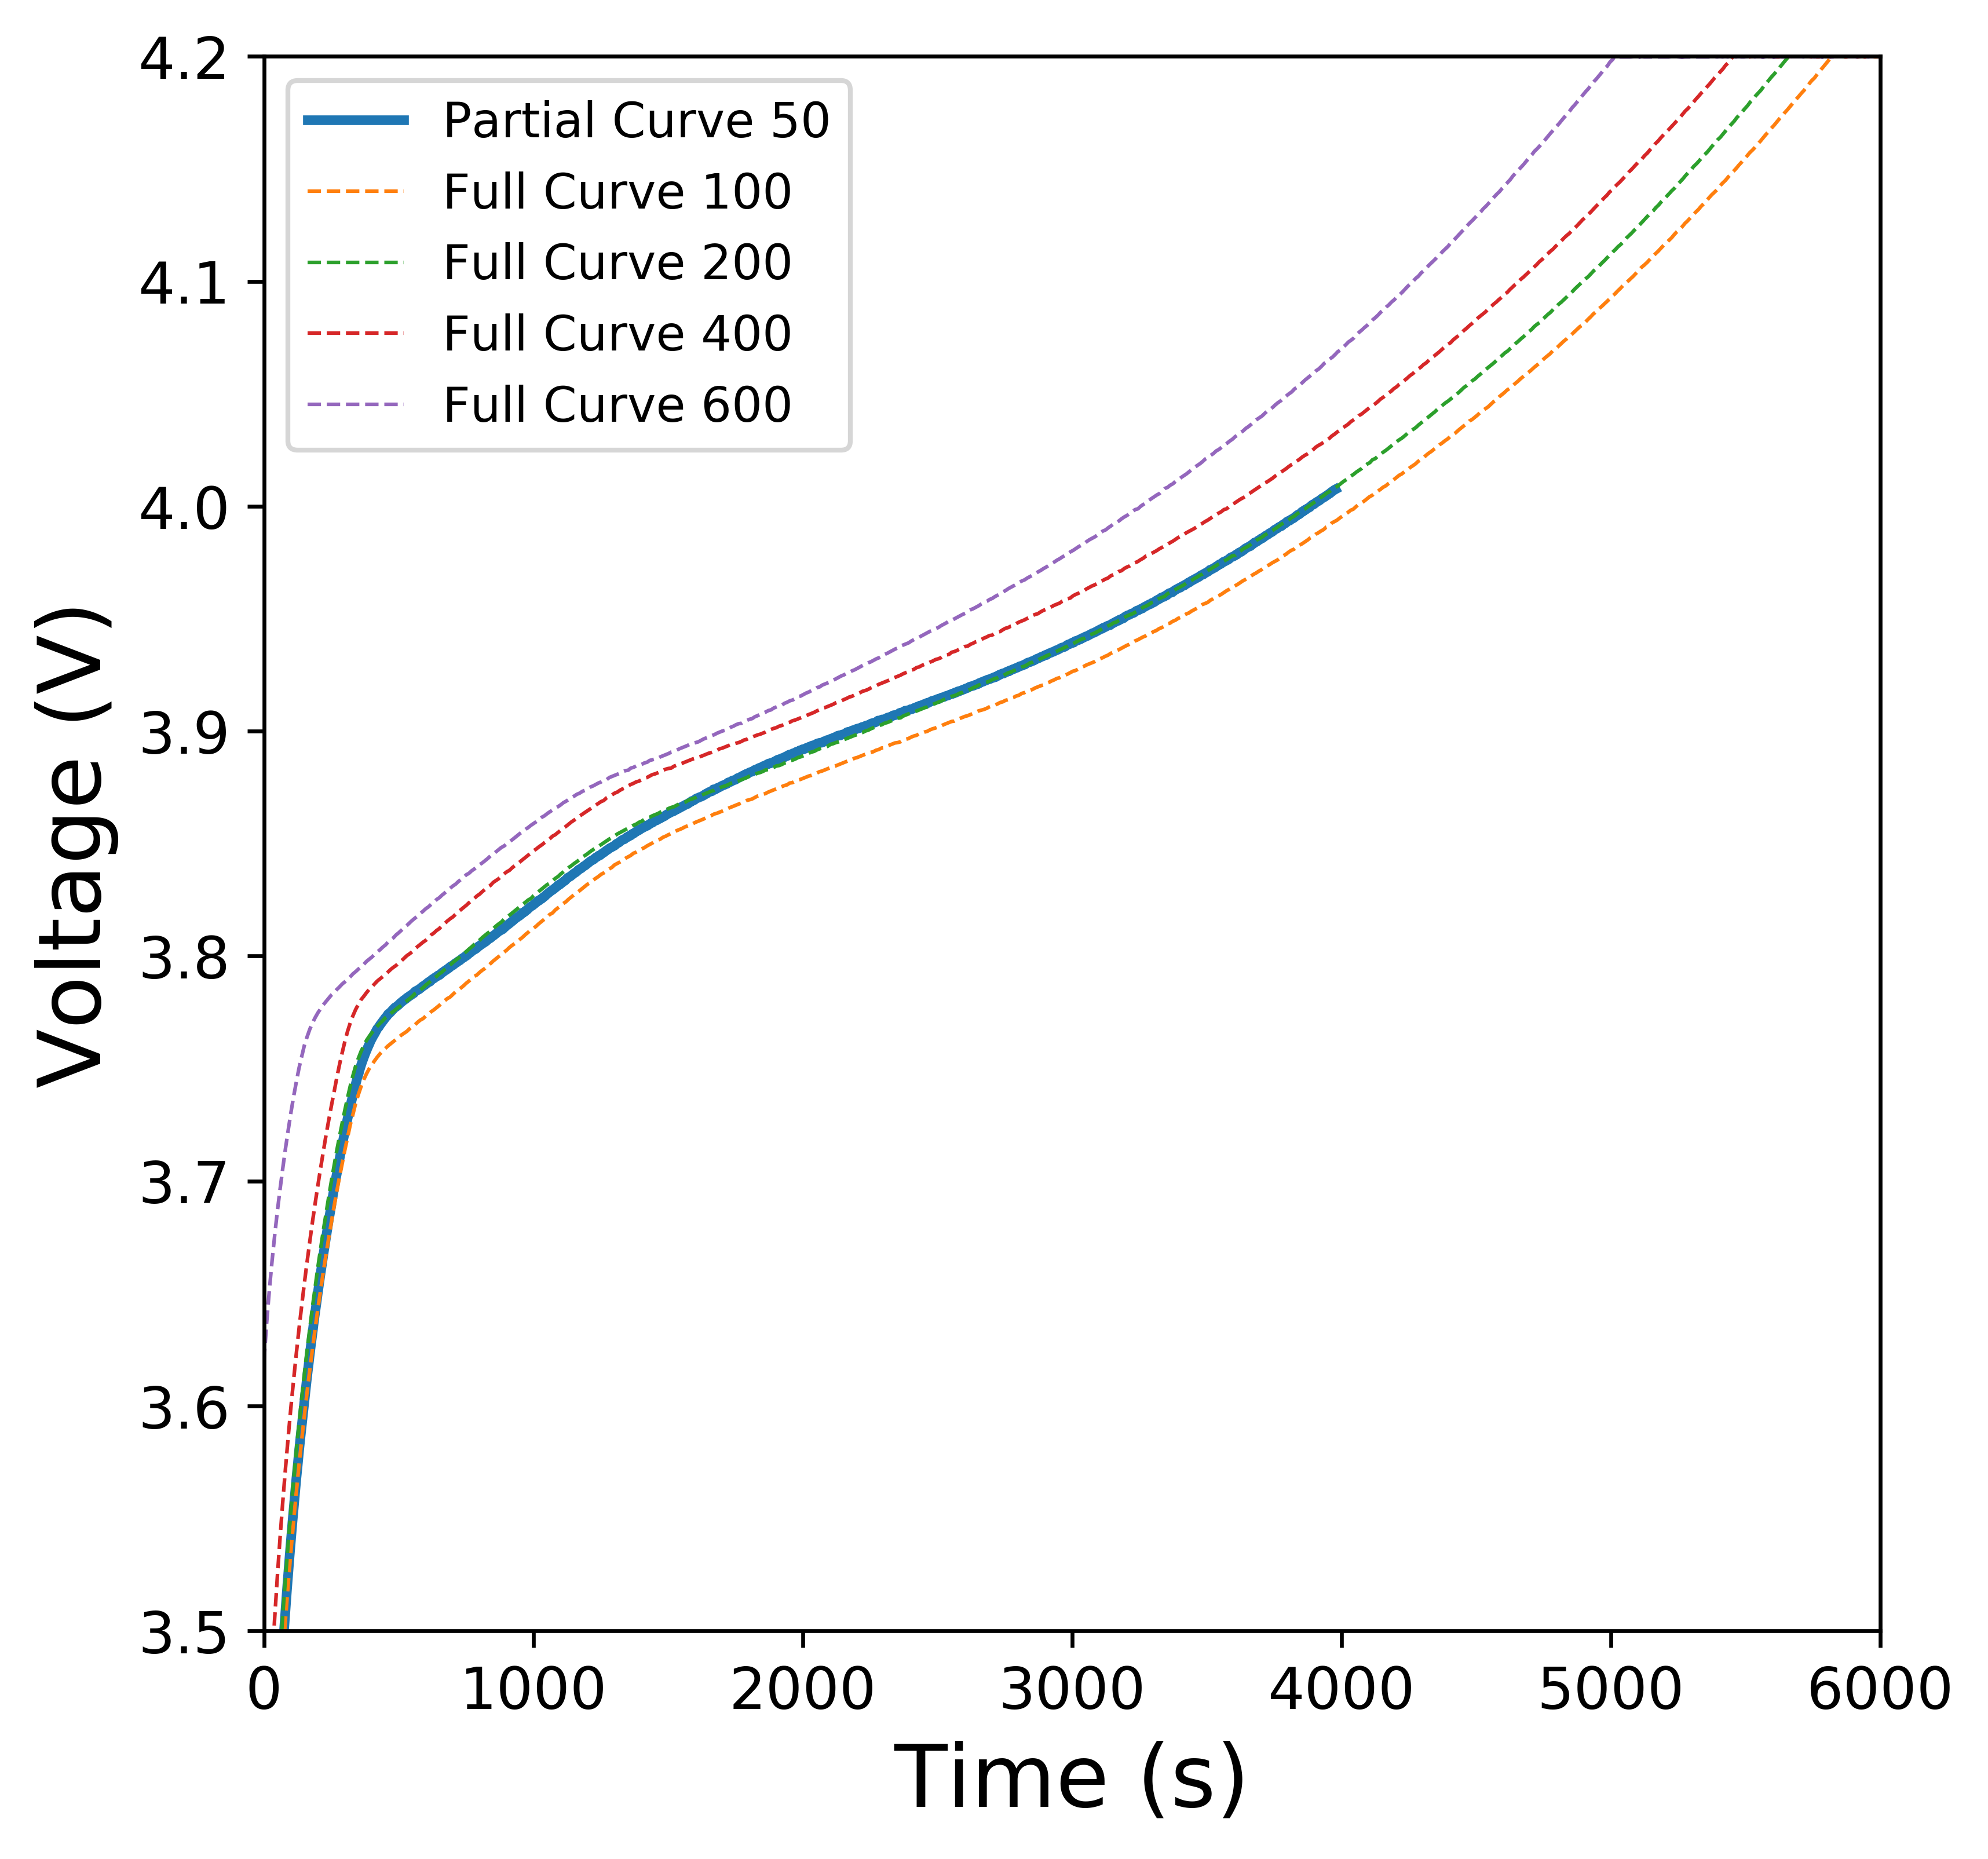

In [134]:
plt.figure(figsize = (6,6), dpi = 600)
plt.plot((pcharge[50]['time']-pcharge[50]['time'].iloc[0]), pcharge[50]['voltage'], label = 'Partial Curve 50', lw = 2)
plt.plot((fcharge[100]['time']-fcharge[100]['time'].iloc[0]), fcharge[100]['voltage'], label = 'Full Curve 100', lw = 0.75, ls = '--')
plt.plot((fcharge[200]['time']-fcharge[200]['time'].iloc[0]), fcharge[200]['voltage'], label = 'Full Curve 200', lw = 0.75, ls = '--')
plt.plot((fcharge[400]['time']-fcharge[400]['time'].iloc[0]), fcharge[400]['voltage'], label = 'Full Curve 400', lw = 0.75, ls = '--')
plt.plot((fcharge[600]['time']-fcharge[600]['time'].iloc[0]), fcharge[600]['voltage'], label = 'Full Curve 600', lw = 0.75, ls = '--')
plt.xlim(0, 6000)
plt.ylim(3.5, 4.2)
plt.legend(fontsize = 'medium')
plt.ylabel('Voltage (V)', fontsize = 18)
plt.xlabel('Time (s)', fontsize = 18)
#plt.title('Comparison of Individual Partial Curve to Full Curves', fontsize = 10)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig("Comparison.png", dpi  =600)

In [26]:
#Make a shorter partial curve dictionary to uses as train set (because if not the code takes too long)
PLd_short = {}
for idx in range(1, len(pdischarge.keys()), 50):
        if idx in pdischarge.keys():
            if idx not in PLd_short.keys():
                PLd_short[idx] = pdischarge[idx]
PLd_short.keys()

dict_keys([1001, 1, 451, 101, 551, 201, 951, 651, 301, 1051, 401, 51, 501, 151, 901, 601, 851, 251, 701, 351])

In [29]:
full_curvesd_short = {}
for idx in range(1, len(fdischarge2.keys()), 50):
        if idx in fdischarge2.keys():
            if idx not in full_curvesd_short.keys():
                full_curvesd_short[idx] = fdischarge2[idx]
full_curvesd_short.keys()

dict_keys([1, 101, 551, 201, 651, 301, 751, 401, 801, 51, 501, 151, 601, 251, 701, 351])

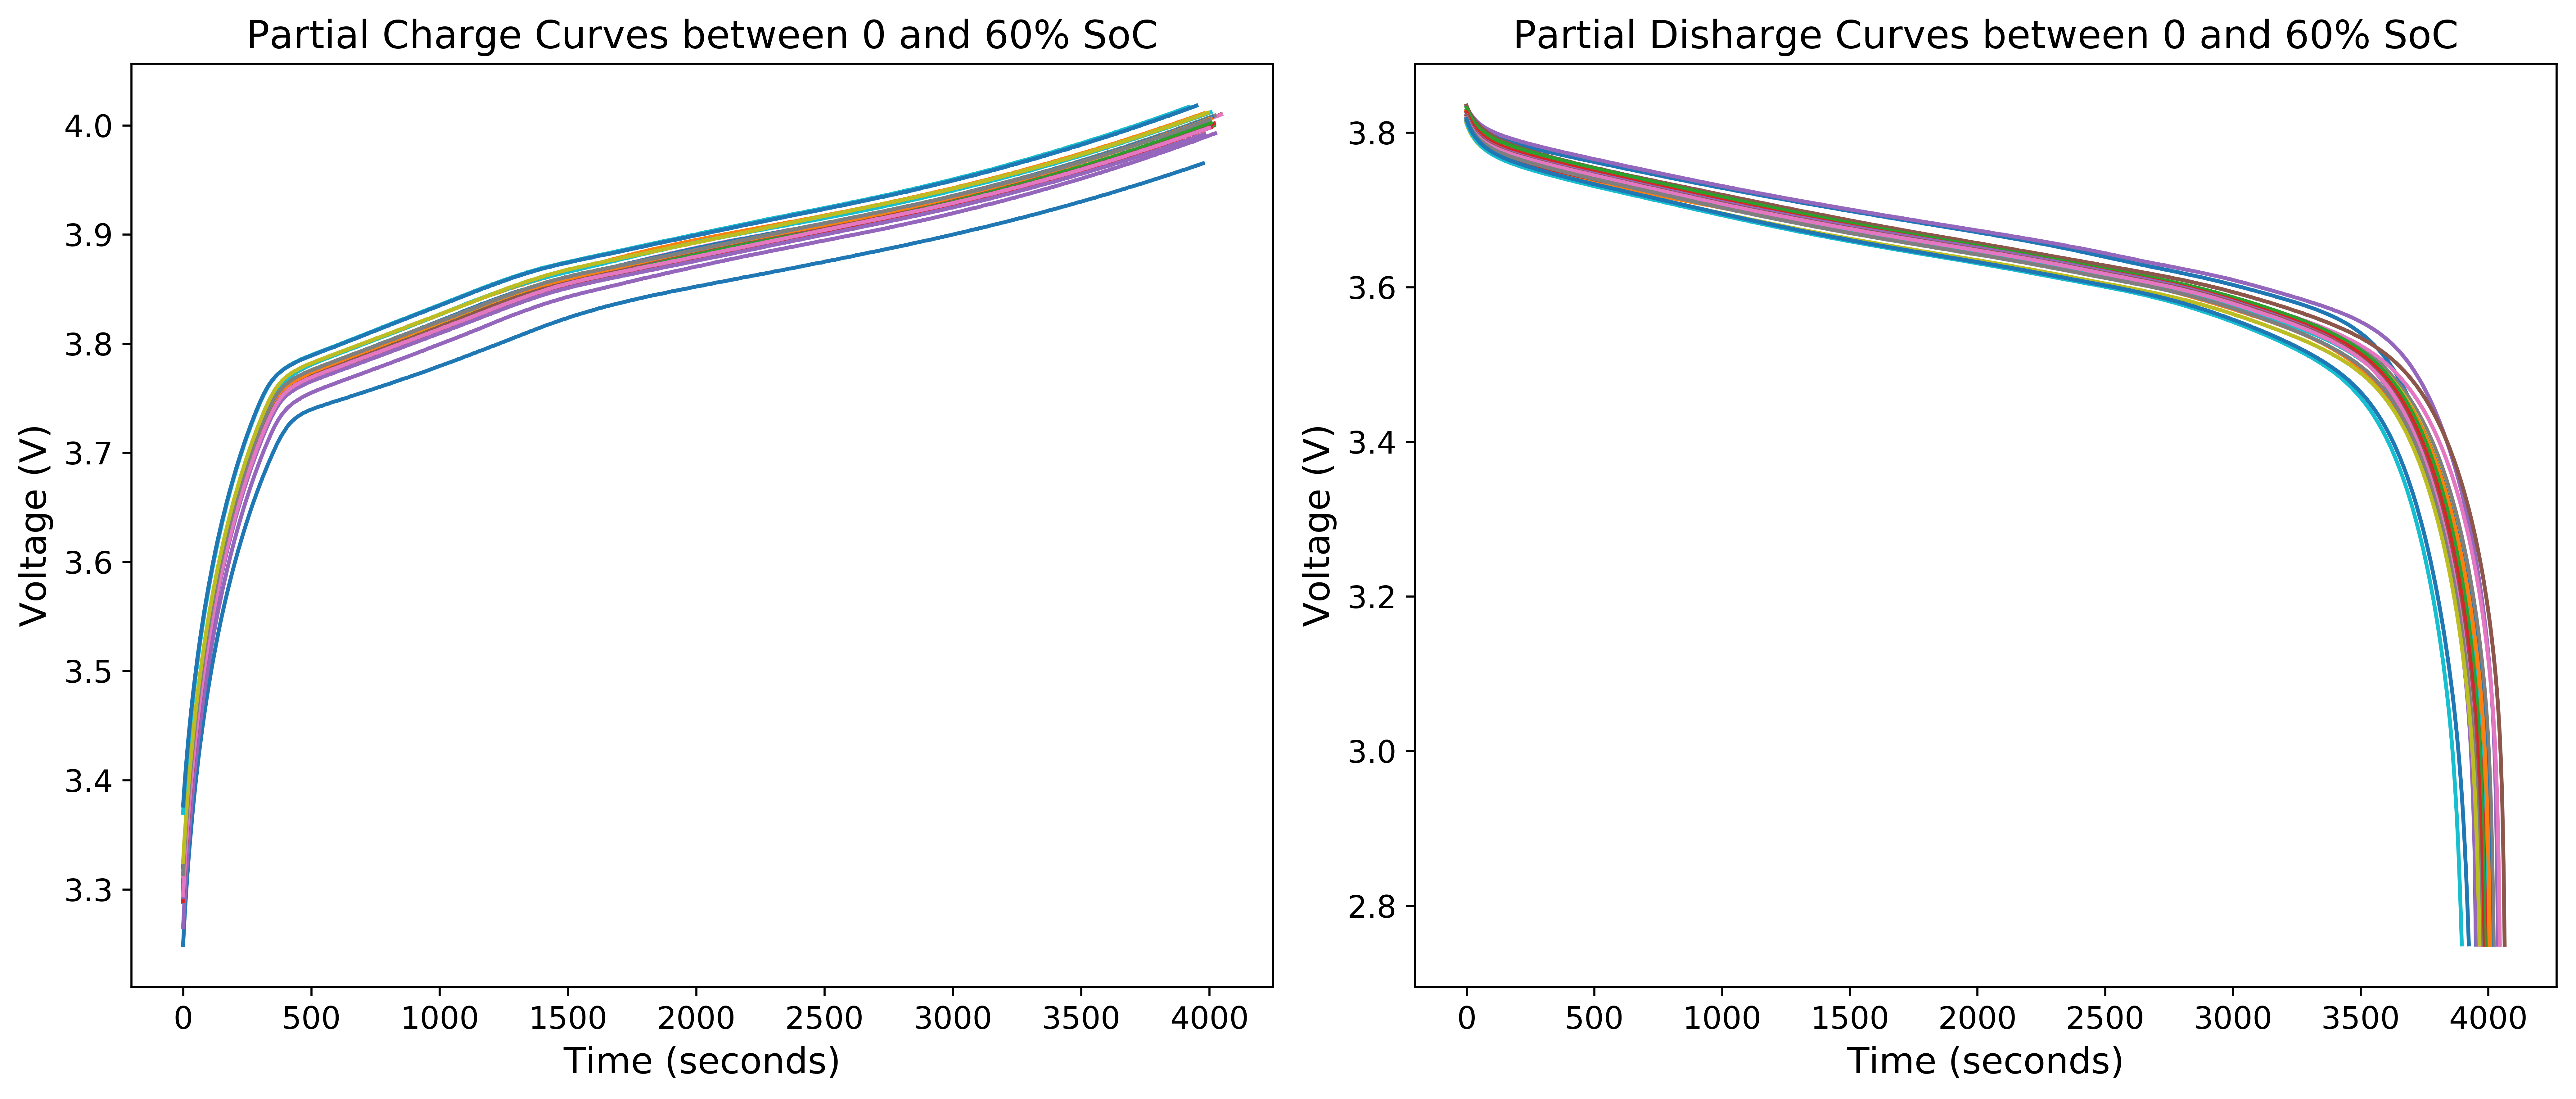

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6), dpi = 600)
#plt.figure(figsize = (6, 6))
for i in range(24, 899, 36):
    if i in charge.keys():
        ax[0].plot((charge[i]['time']-charge[i]['time'].iloc[0]), charge[i]['voltage'])
    else:
        pass

for i in range(24, 899, 36):
    if i in discharge.keys():
        ax[1].plot((discharge[i]['time']-discharge[i]['time'].iloc[0]), discharge[i]['voltage'])
    else:
        pass


ax[0].set_xlabel('Time (seconds)', fontsize = 14)
ax[0].set_ylabel('Voltage (V)', fontsize = 14)
ax[0].set_title('Partial Charge Curves between 0 and 60% SoC', fontsize = 15)
ax[0].tick_params(axis='both', which='major', labelsize=12)

ax[1].set_xlabel('Time (seconds)', fontsize = 14)
ax[1].set_ylabel('Voltage (V)', fontsize = 14)
ax[1].set_title('Partial Disharge Curves between 0 and 60% SoC', fontsize = 15)
ax[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()

plt.show()


In [22]:
import predict_capacity

In [32]:
Percent, Time, Slope, Intercept, Life = predict_capacity.get_lifetime(PLd_short,full_curvesd_short,1.5)

HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

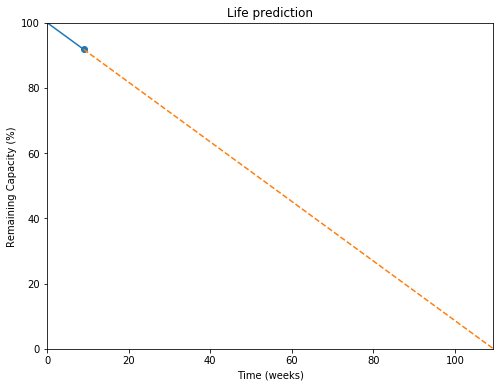

In [35]:
predict_capacity.life_plot(Time[1],Slope[1],Intercept[1],Percent[1],Life[1])

In [121]:
def life_plot(time,slope,intercept,percent,life):
    
    fig = plt.figure(figsize = (5,5), dpi = 600)
    x = [time/(3600*24*7),life/(3600*24*7)]
    y = [time*slope + intercept, life*slope + intercept]
    
    x1 = [0,time/(3600*24*7)]
    y1 = [intercept, time*slope + intercept]
   
    plt.plot(time/(3600*24*7),percent, marker = "*", markersize = 15.0 , color = "green")
    plt.plot(x1,y1, lw = 3)
    plt.plot(x,y,ls = '--', lw = 3)
  
    plt.ylim(0, 100)
    plt.xlim(0, life/(3600*24*7))
    #plt.title('Life prediction')
    plt.xlabel('Time (weeks)', fontsize = 18)
    plt.ylabel('Remaining Capacity (%)', fontsize = 18)
    plt.tick_params(axis='both', which='major', labelsize=12)
    return 

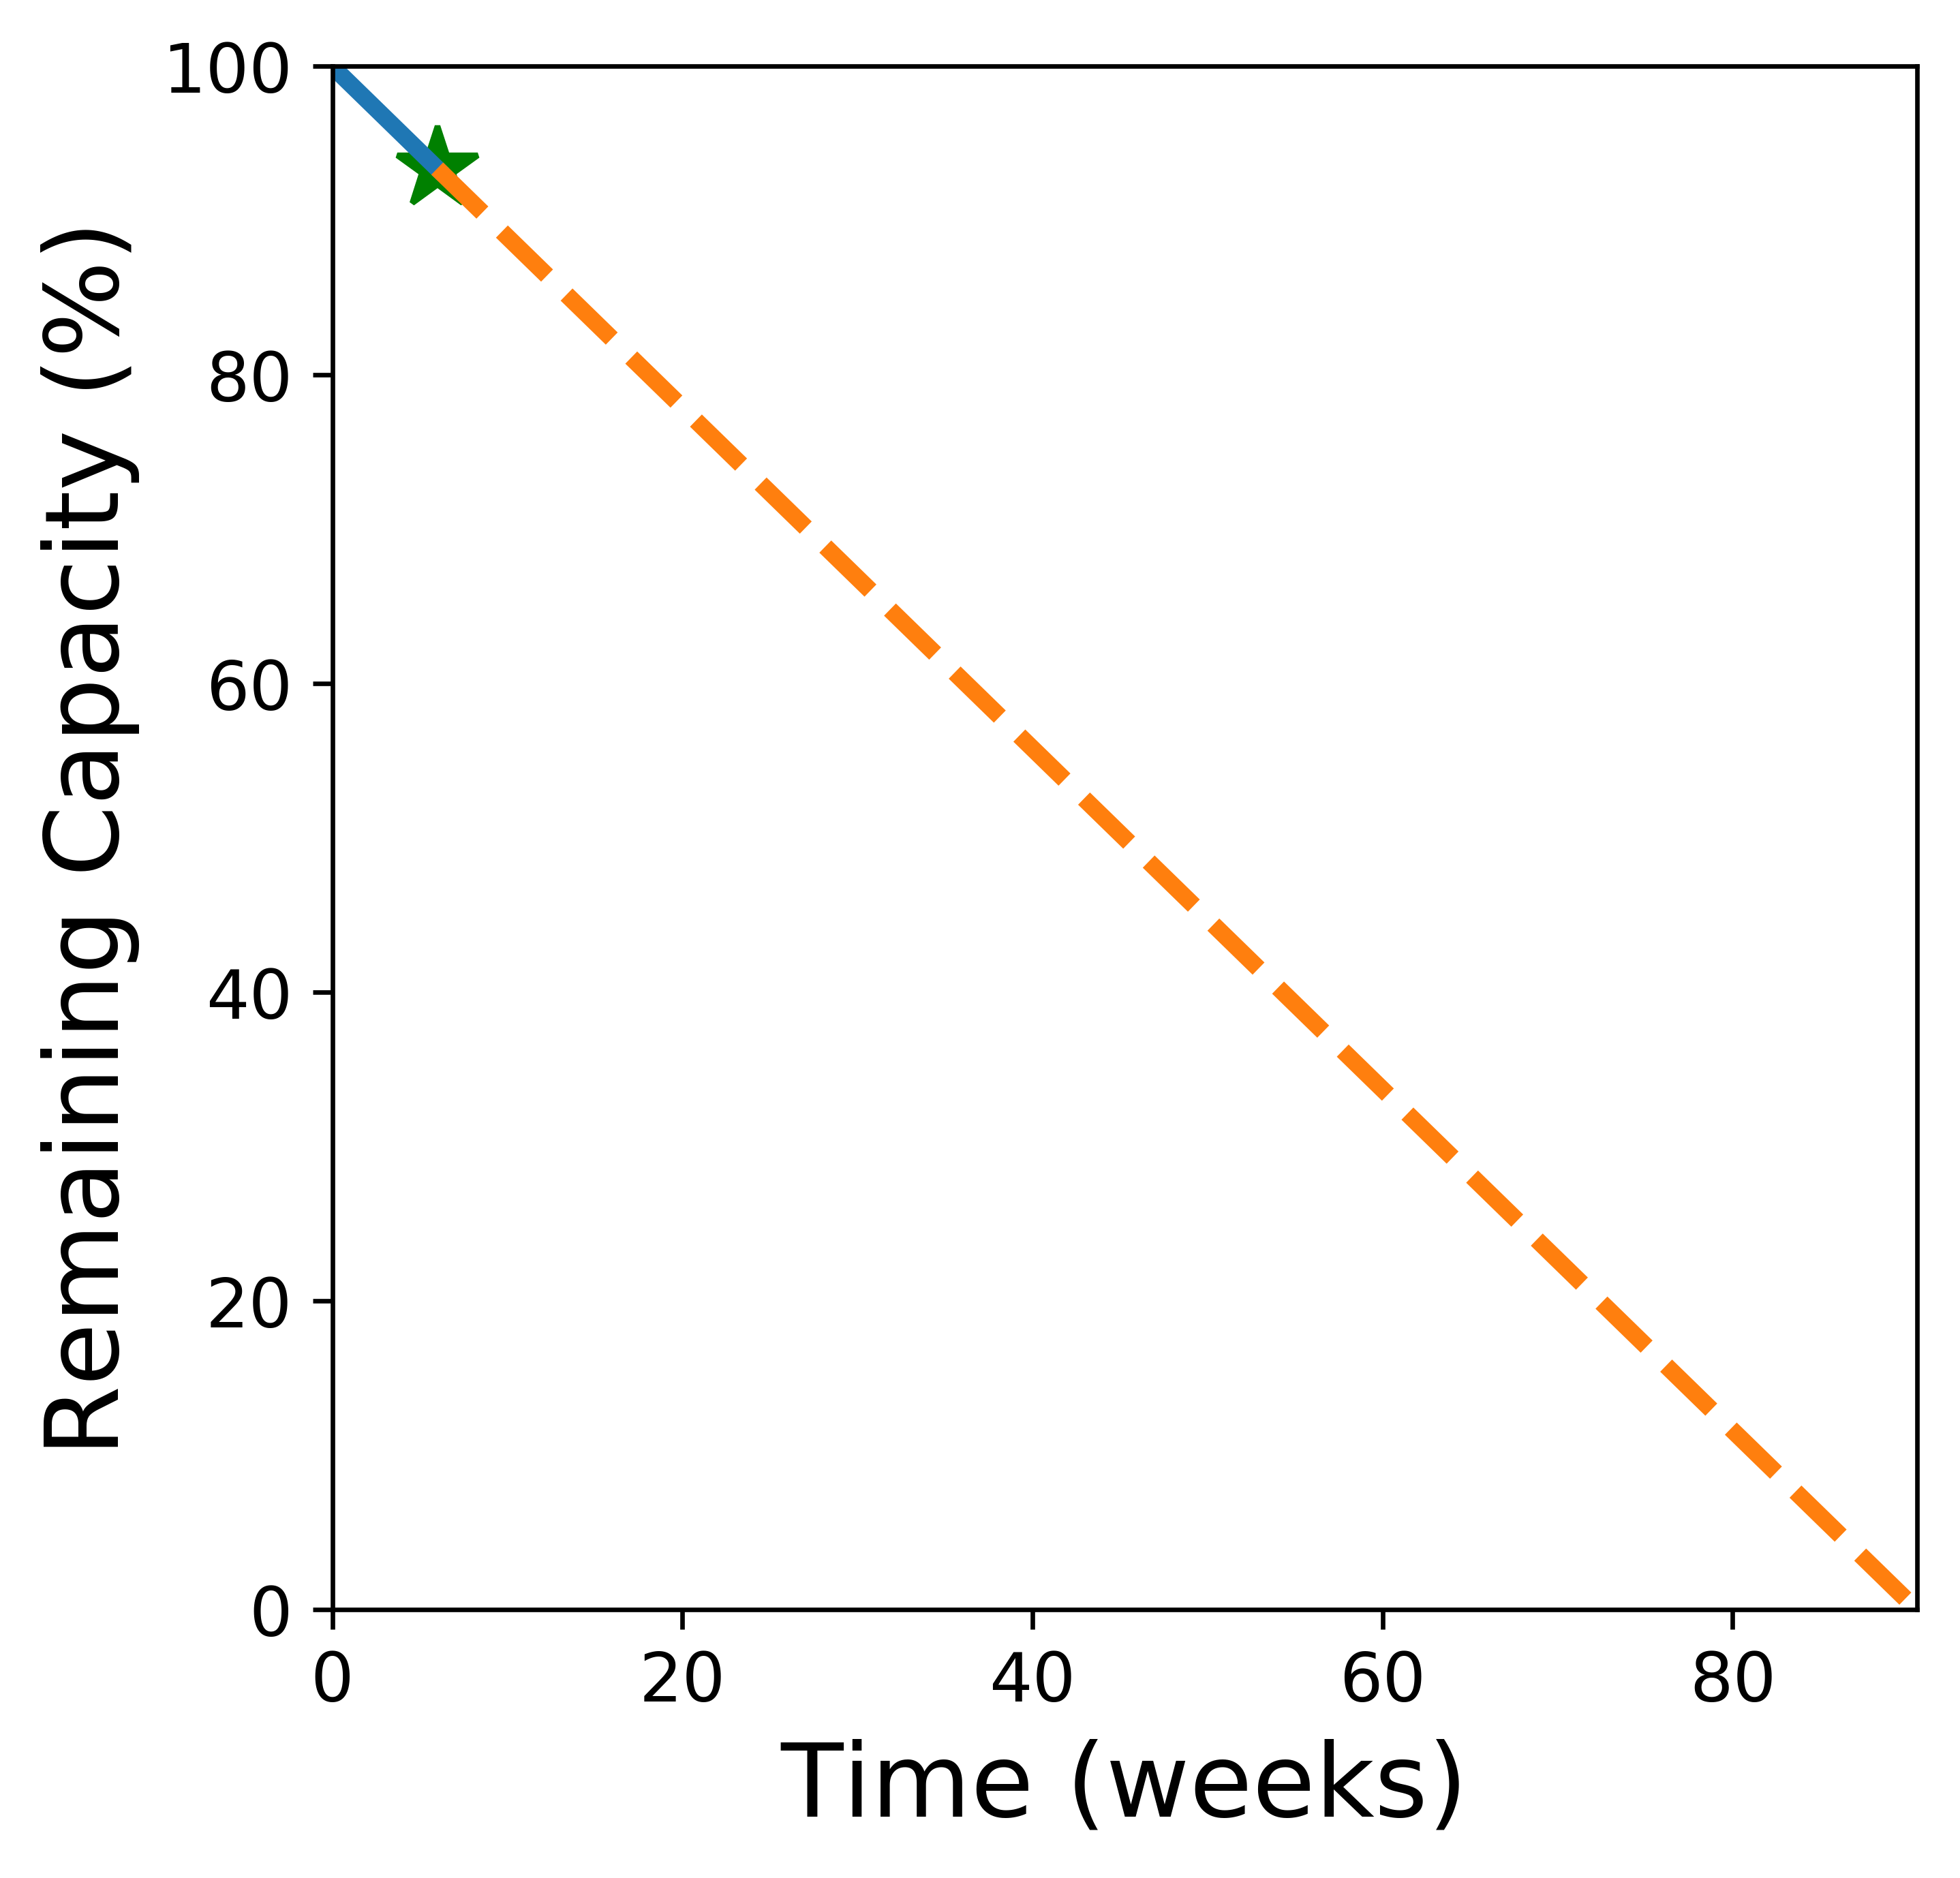

In [129]:
life_plot(Time[7],Slope[7],Intercept[7],Percent[7],Life[7])
plt.savefig("Life.png", dpi = 600)

In [128]:
from dtaidistance import dtw
import numpy as np
s1 = np.array([0., 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0])
s2 = np.array([0., 1, 2, 3, 1, 0, 0, 0, 2, 1, 0, 0, 0])
path = dtw.warping_path(s1, s2)
dtw.s1, s2, path, filename="warp.png")
n 

TypeError: warping_path() takes 2 positional arguments but 3 were given